# Helper Functions

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

def weight_variable(shape):
    # dirty workaround, error converting Dimension to int
    # error only occurs in jupyter
    shape[0] = int(shape[0])
    
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable( shape ):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d( x, W ):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def conv_layer(_input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu( conv2d(_input, W) + b )

def full_layer(_input, size):
    W = weight_variable([_input.get_shape()[1], size])
    b = bias_variable( [size] )
    return tf.matmul(_input, W) + b

In [2]:
x  = tf.placeholder( tf.float32, shape=[None, 784])
y_ = tf.placeholder( tf.float32, shape=[None, 10])

x_image = tf.reshape(x, [-1, 28,28, 1])

conv1      = conv_layer( x_image, shape=[5,5,1,32])
conv1_pool = max_pool_2x2( conv1 )

conv2      = conv_layer( conv1_pool, shape=[5,5,32,64])
conv2_pool = max_pool_2x2( conv2 )

conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1     = tf.nn.relu(full_layer(conv2_flat, 1024))

keep_prob  = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

In [3]:
DATA_DIR = '../data'
mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_conv, labels=y_))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_,1))

pred = tf.argmax(y_conv, 1)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
STEPS = 5000
BATCH_SIZE = 50

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    X = mnist.test.images.reshape(10,1000,784)
    Y = mnist.test.labels.reshape(10,1000,10)
    
    for i in range(STEPS):
        batch = mnist.train.next_batch(BATCH_SIZE)
        
        if i % 100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={
                x: batch[0],
                y_: batch[1],
                keep_prob: 1.0
            })
            print(f"step: {i} \t training accuracy: {train_accuracy}")
            
        sess.run(train_step, feed_dict={
                x: batch[0],
                y_: batch[1],
                keep_prob: .5
            })
        
    test_accuracy = np.mean([sess.run(accuracy, 
                                     feed_dict={
                                         x: X[i], 
                                         y_: Y[i], 
                                         keep_prob: 1.0
                                     })
                            for i in range(10)])

    test_accuracy = np.mean([sess.run(accuracy, 
                                     feed_dict={
                                         x: X[i], 
                                         y_: Y[i], 
                                         keep_prob: 1.0
                                     })
                            for i in range(10)])
    
    _correct = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob:1.0})
    _pred = sess.run(pred, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob:1.0})
    
    print(f"test accuracy {test_accuracy}")

step: 0 	 training accuracy: 0.07999999821186066
step: 100 	 training accuracy: 0.8199999928474426
step: 200 	 training accuracy: 0.8799999952316284
step: 300 	 training accuracy: 0.8999999761581421
step: 400 	 training accuracy: 0.9399999976158142
step: 500 	 training accuracy: 0.9200000166893005
step: 600 	 training accuracy: 1.0
step: 700 	 training accuracy: 0.9200000166893005
step: 800 	 training accuracy: 0.9800000190734863
step: 900 	 training accuracy: 0.9800000190734863
step: 1000 	 training accuracy: 0.9599999785423279
step: 1100 	 training accuracy: 0.9800000190734863
step: 1200 	 training accuracy: 1.0
step: 1300 	 training accuracy: 1.0
step: 1400 	 training accuracy: 1.0
step: 1500 	 training accuracy: 0.9800000190734863
step: 1600 	 training accuracy: 0.9800000190734863
step: 1700 	 training accuracy: 0.9599999785423279
step: 1800 	 training accuracy: 0.9800000190734863
step: 1900 	 training accuracy: 0.8999999761581421
step: 2000 	 training accuracy: 1.0
step: 2100 	 tr

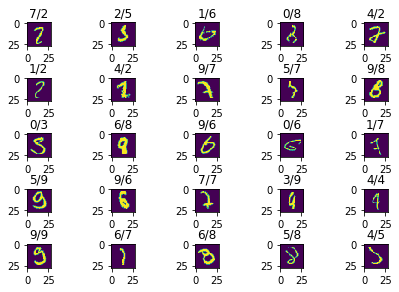

In [6]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

wrong_pred = mnist.test.images[_correct == False]

f, axarr = plt.subplots( 5, 5)
f.tight_layout()

Y_true = np.argmax(mnist.test.labels, 1)[_correct == False]
    
for i in range(0,25):
    a = np.reshape(wrong_pred[i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)
    axarr[int(i/5),i%5].set_title(f"{_pred[i]}/{Y_true[i]}") 
    
plt.show()

In [18]:
STEPS = 2000
BATCH_SIZE = 50

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

X = mnist.test.images.reshape(10,1000,784)
Y = mnist.test.labels.reshape(10,1000,10)

for i in range(STEPS):
    batch = mnist.train.next_batch(BATCH_SIZE)
    
    if i % 100 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={
            x: batch[0],
            y_: batch[1],
            keep_prob: 1.0
        })
        print(f"step: {i} \t training accuracy: {train_accuracy}")
        
    sess.run(train_step, feed_dict={
            x: batch[0],
            y_: batch[1],
            keep_prob: .5
        })
    
test_accuracy = np.mean([sess.run(accuracy, 
                                 feed_dict={
                                     x: X[i], 
                                     y_: Y[i], 
                                     keep_prob: 1.0
                                 })
                        for i in range(10)])

test_accuracy = np.mean([sess.run(accuracy, 
                                 feed_dict={
                                     x: X[i], 
                                     y_: Y[i], 
                                     keep_prob: 1.0
                                 })
                        for i in range(10)])

_correct = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob:1.0})
_pred = sess.run(pred, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob:1.0})

print(f"test accuracy {test_accuracy}")

step: 0 	 training accuracy: 1.0
step: 100 	 training accuracy: 1.0
step: 200 	 training accuracy: 1.0
step: 300 	 training accuracy: 1.0
step: 400 	 training accuracy: 1.0
step: 500 	 training accuracy: 1.0
step: 600 	 training accuracy: 1.0
step: 700 	 training accuracy: 1.0
step: 800 	 training accuracy: 1.0
step: 900 	 training accuracy: 1.0
step: 1000 	 training accuracy: 0.9800000190734863
step: 1100 	 training accuracy: 0.9800000190734863
step: 1200 	 training accuracy: 1.0
step: 1300 	 training accuracy: 1.0
step: 1400 	 training accuracy: 1.0
step: 1500 	 training accuracy: 1.0
step: 1600 	 training accuracy: 0.9800000190734863
step: 1700 	 training accuracy: 1.0
step: 1800 	 training accuracy: 0.9800000190734863
step: 1900 	 training accuracy: 1.0
test accuracy 0.991100013256073


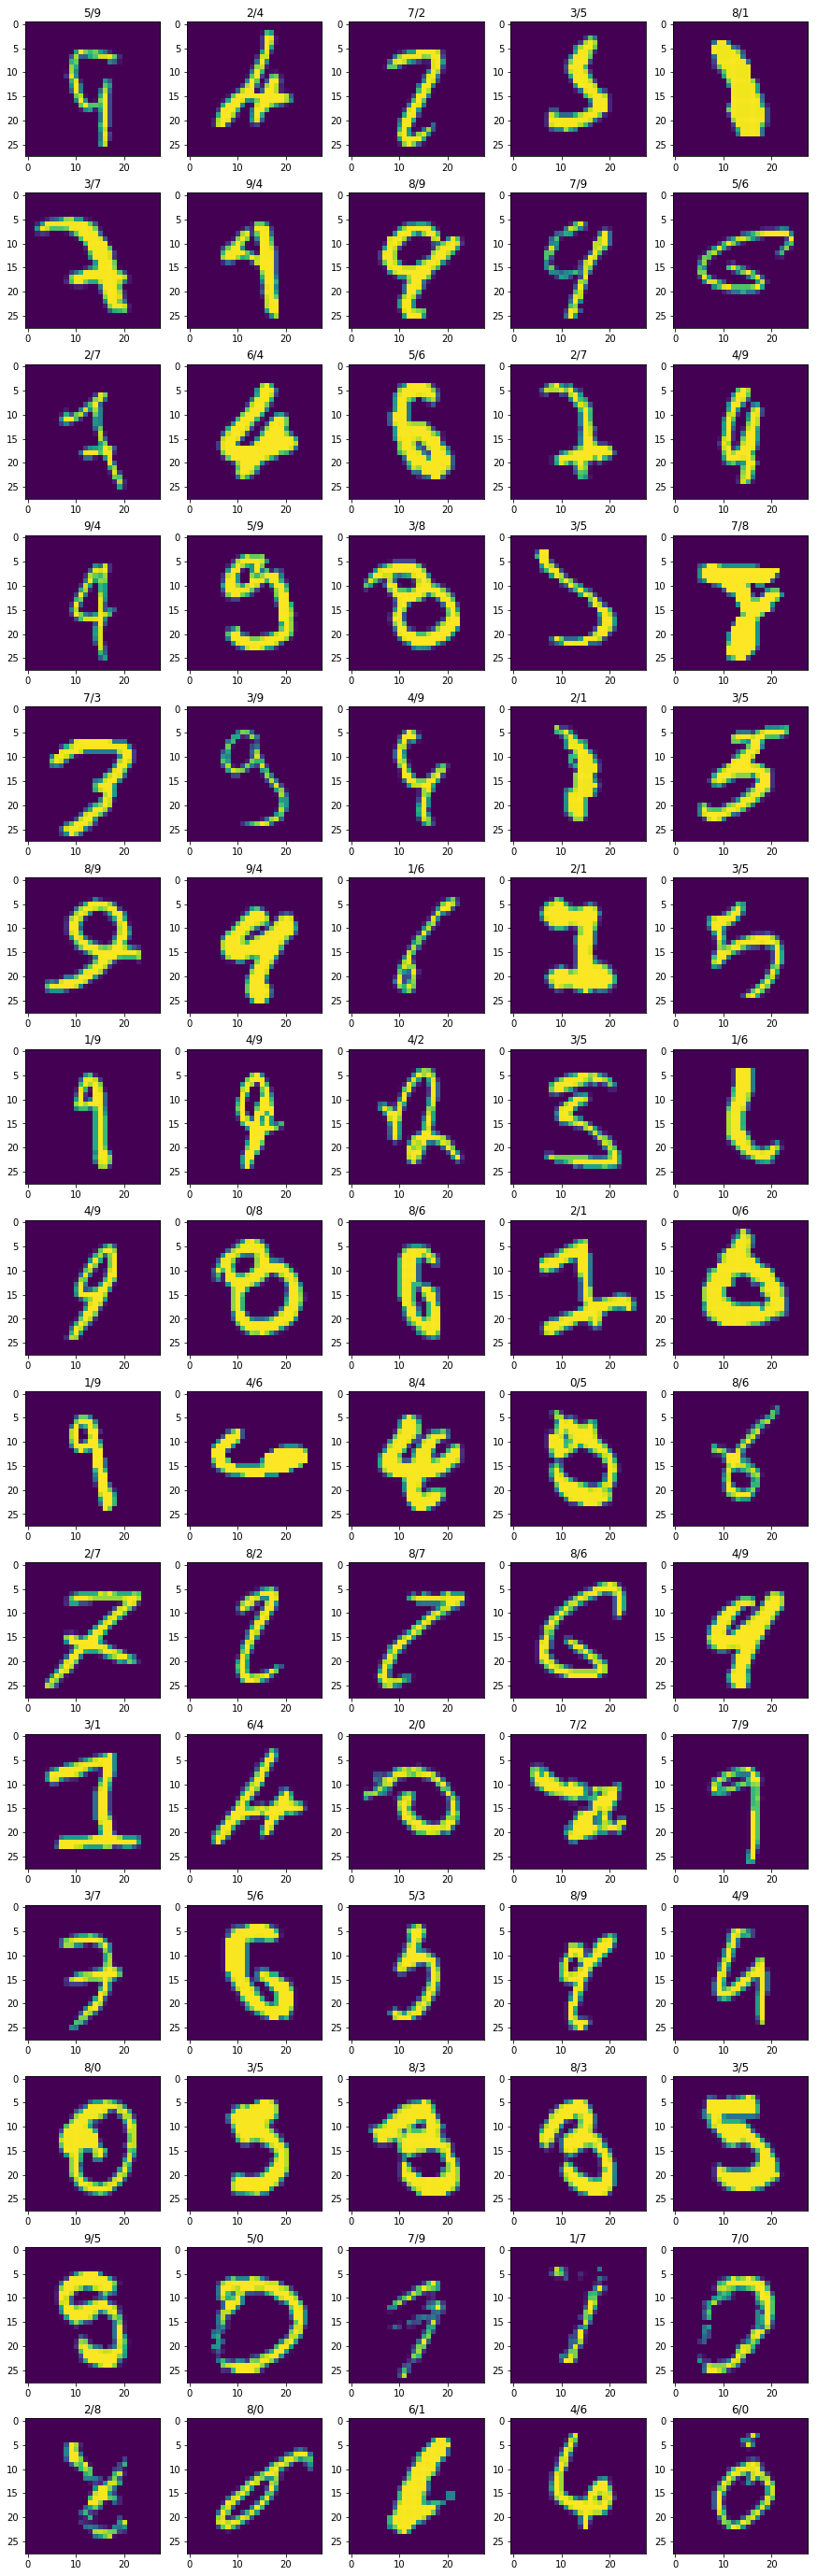

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

wrong_pred = mnist.test.images[_correct == False]

f, axarr = plt.subplots( 15, 5)
f.tight_layout()

f.set_figheight(50)
f.set_figwidth(15)

Y_true = np.argmax(mnist.test.labels, 1)[_correct == False]
# _pred = _pred[_correct == False ]

for i in range(0,75):
    a = np.reshape(wrong_pred[i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)
    axarr[int(i/5),i%5].set_title(f"{_pred[i]}/{Y_true[i]}") 
    
plt.show()